In [75]:
'''
This jupyter notebook is used to generate the quality control plots for the surface generation along surfnorm.
(1) using the previous method, 1 voxel away* (resolution @120um)
(2) using the Surface Tools (https://github.com/kwagstyl/surface_tools), which segmenets two surfaces at equidistance 
    - Need to install the tool : pip install git+https://github.com/kwagstyl/surface_tools
    #generate new conda enviornment for surface_tools
    - conda create -n surface_tools python=3.10
    - conda activate surface_tools

    #install surface_tools
    - pip install git+https://github.com/kwagstyl/surface_tools


    usage: generate_equivolumetric_surfaces [-h] [--smoothing SMOOTHING]
                                            [--software {CIVET,freesurfer}]
                                            [--subject_id SUBJECT_ID]
                                            gray white n_surfs output

    Generate equivolumetric surfaces between input surfaces

    positional arguments:
    gray                  input gray surface
    white                 input white surface
    n_surfs               number of output surfaces, also returns gray and white
                            surfaces at 0 and 1
    output                output surface prefix e.g., equi_left_{N}

    options:
    -h, --help            show this help message and exit
    --smoothing SMOOTHING
                            fwhm of surface area smoothing (default=0mm)
    --software {CIVET,freesurfer}
                            surface software package
    --subject_id SUBJECT_ID
                            subject name if freesurfer
'''
import os
import subprocess
#for freesurefer
#generate_equivolumetric_surfaces --smoothing 0 <subj>/surf/lh.pial <subj>/surf/lh.white 5 lh.equi --software freesurfer --subject_id SUBJECT_ID
subject_id = "I45_new_confidence"
data_path = f"/Users/dennis.jungchildmind.org/Desktop/incoming_exvivoMRI/{subject_id}/surf"

smoothing_level = 0
white_surf = os.path.join(data_path, "lh.white")#from 0 depth
pial_surf = os.path.join(data_path, "lh.pial")#at full depth (1)
n_surf = 10+1

# Set up FreeSurfer environment variables
os.environ['SUBJECTS_DIR'] = '/Users/dennis.jungchildmind.org/Desktop/incoming_exvivoMRI'
os.environ['FS_LICENSE'] = '/Applications/freesurfer/7.4.1/license.txt'
os.environ['FREESURFER_HOME'] = '/Applications/freesurfer/7.4.1'

# Add FreeSurfer bin to PATH
current_path = os.environ.get('PATH', '')
freesurfer_bin = '/Applications/freesurfer/7.4.1/bin'
if freesurfer_bin not in current_path:
    os.environ['PATH'] = f"{freesurfer_bin}:{current_path}"

# Test if FreeSurfer tools are accessible
print("Testing FreeSurfer environment setup...")
print(f"SUBJECTS_DIR: {os.environ.get('SUBJECTS_DIR')}")
print(f"FREESURFER_HOME: {os.environ.get('FREESURFER_HOME')}")
print(f"FS_LICENSE: {os.environ.get('FS_LICENSE')}")

# Test mris_fwhm command
try:
    result = subprocess.run(['which', 'mris_fwhm'], capture_output=True, text=True)
    if result.returncode == 0:
        print(f"mris_fwhm found at: {result.stdout.strip()}")
    else:
        print("mris_fwhm not found in PATH")
except Exception as e:
    print(f"Error checking mris_fwhm: {e}")

# Test if mris_fwhm can run (check version or help)
try:
    result = subprocess.run(['mris_fwhm', '--help'], capture_output=True, text=True, timeout=10)
    print(f"mris_fwhm test result: {result.returncode}")
    if result.returncode != 0:
        print(f"mris_fwhm stderr: {result.stderr}")
except Exception as e:
    print(f"Error running mris_fwhm: {e}")

# Check if subject directory and surfaces exist
print(f"\nChecking file paths:")
print(f"Subject directory exists: {os.path.exists(os.path.join(os.environ['SUBJECTS_DIR'], subject_id))}")
print(f"White surface exists: {os.path.exists(white_surf)}")
print(f"Pial surface exists: {os.path.exists(pia_surf)}")

# Check if label directory exists (required by FreeSurfer)
label_dir = os.path.join(os.environ['SUBJECTS_DIR'], subject_id, 'label')
print(f"Label directory exists: {os.path.exists(label_dir)}")
if not os.path.exists(label_dir):
    print("Creating label directory...")
    os.makedirs(label_dir, exist_ok=True)

command = f'generate_equivolumetric_surfaces --smoothing {smoothing_level} {pial_surf} {white_surf} {n_surf} lh.equi --software freesurfer --subject_id {subject_id}'

print(f"\nCommand: {command}")

# Run the command
result = os.system(command)
print(f"Command exit code: {result}")


Testing FreeSurfer environment setup...
SUBJECTS_DIR: /Users/dennis.jungchildmind.org/Desktop/incoming_exvivoMRI
FREESURFER_HOME: /Applications/freesurfer/7.4.1
FS_LICENSE: /Applications/freesurfer/7.4.1/license.txt
mris_fwhm found at: /Applications/freesurfer/7.4.1/bin/mris_fwhm
mris_fwhm test result: 1
mris_fwhm stderr: 

Checking file paths:
Subject directory exists: True
White surface exists: True
Pial surface exists: True
Label directory exists: True

Command: generate_equivolumetric_surfaces --smoothing 0 /Users/dennis.jungchildmind.org/Desktop/incoming_exvivoMRI/I45_new_confidence/surf/lh.pial /Users/dennis.jungchildmind.org/Desktop/incoming_exvivoMRI/I45_new_confidence/surf/lh.white 11 lh.equi --software freesurfer --subject_id I45_new_confidence


python(57995) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(57996) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


I45_new_confidence lh white
Number of vertices 237847
Number of faces    475690
Total area         81907.375000
GroupSurface 0
AvgVtxArea       0.344370
AvgVtxDist       0.636407
StdVtxDist       0.115791
Found 225401 voxels in mask
Not Polynomial detrending
Computing spatial AR1 
ar1mn = 1, ar1std = 0, ar1max = 1
avg vertex dist 0.636407
avg vertex dist 0.636407
fwhm = -inf
I45_new_confidence lh white
Number of vertices 237847
Number of faces    475690
Total area         81907.375000
GroupSurface 0
AvgVtxArea       0.344370
AvgVtxDist       0.636407
StdVtxDist       0.115791
Found 225401 voxels in mask
Not Polynomial detrending
Computing spatial AR1 
ar1mn = 1, ar1std = 0, ar1max = 1
avg vertex dist 0.636407
avg vertex dist 0.636407
fwhm = -inf
Creating surface 1
Creating surface 2
Creating surface 3
Creating surface 4
Creating surface 5
Creating surface 6
Creating surface 7
Creating surface 8
Creating surface 9
Creating surface 10
Creating surface 11
Command exit code: 0


In [ ]:
import nibabel as nib
dist = ["0.0","0.2","0.4","0.6","0.8","1.0"]
for d in dist:
    filepath = os.path.join(data_path, f"lh.equi{d}.pial")
    #need to convert from freesurfer to the surf.gii using workbench
    cmd = f"mris_convert {filepath} {filepath}.surf.gii"
    os.system(cmd)
    

Saving /Users/dennis.jungchildmind.org/Desktop/incoming_exvivoMRI/I45_new_confidence/surf/lh.equi0.0.pial.surf.gii as a surface in TKREGISTER space
Saving /Users/dennis.jungchildmind.org/Desktop/incoming_exvivoMRI/I45_new_confidence/surf/lh.equi0.2.pial.surf.gii as a surface in TKREGISTER space
Saving /Users/dennis.jungchildmind.org/Desktop/incoming_exvivoMRI/I45_new_confidence/surf/lh.equi0.4.pial.surf.gii as a surface in TKREGISTER space
Saving /Users/dennis.jungchildmind.org/Desktop/incoming_exvivoMRI/I45_new_confidence/surf/lh.equi0.6.pial.surf.gii as a surface in TKREGISTER space
Saving /Users/dennis.jungchildmind.org/Desktop/incoming_exvivoMRI/I45_new_confidence/surf/lh.equi0.8.pial.surf.gii as a surface in TKREGISTER space
Saving /Users/dennis.jungchildmind.org/Desktop/incoming_exvivoMRI/I45_new_confidence/surf/lh.equi1.0.pial.surf.gii as a surface in TKREGISTER space


In [40]:
#load the converted surface files   
all_surfs = []  
for d in dist:
    filepath = os.path.join(data_path, f"lh.equi{d}.pial.surf.gii")
    tmp = nib.load(filepath)
    all_surfs.append(tmp)




(237847, 3)


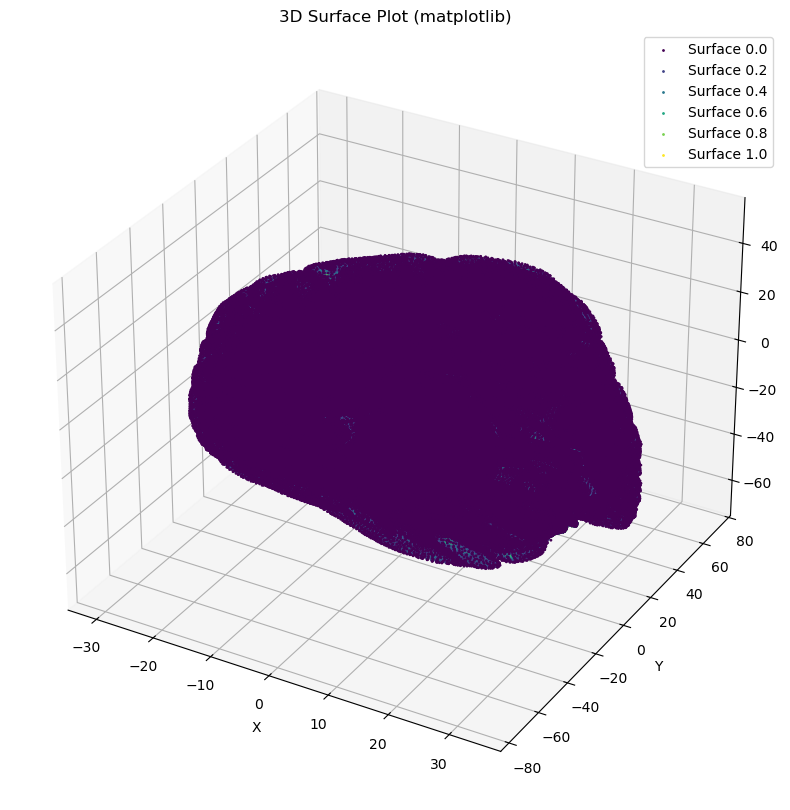

Plotly figure saved as 'surface_plot.html'
Error with plotly display/export: Mime type rendering requires nbformat>=4.2.0 but it is not installed
Falling back to matplotlib only


In [72]:
print(all_surfs[0].darrays[0].data.shape)
#3d plot this all_surfs with interactive capabilities
import matplotlib.pyplot as plt
import numpy as np

# Using matplotlib with inline backend (avoiding plotly due to nbformat dependency issue)
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot all surfaces with different colors
colors = plt.cm.viridis(np.linspace(0, 1, len(all_surfs)))
for i in range(len(all_surfs)): 
    ax.scatter(all_surfs[i].darrays[0].data[:,0], 
              all_surfs[i].darrays[0].data[:,1], 
              all_surfs[i].darrays[0].data[:,2], 
              c=[colors[i]], s=1, alpha=1, label=f'Surface {dist[i]}')

ax.set_xlabel('X')
ax.set_ylabel('Y') 
ax.set_zlabel('Z')
ax.legend()
plt.title('3D Surface Plot (matplotlib)')
plt.show()

# Alternative: Try plotly with different approaches to avoid kaleido issues
try:
    import plotly.graph_objects as go
    import plotly.io as pio
    
    fig_plotly = go.Figure()
    
    # Add each surface as a separate trace
    for i in range(len(all_surfs)):
        fig_plotly.add_trace(go.Scatter3d(
            x=all_surfs[i].darrays[0].data[:,0],
            y=all_surfs[i].darrays[0].data[:,1], 
            z=all_surfs[i].darrays[0].data[:,2],
            mode='markers',
            marker=dict(size=1, opacity=1),
            name=f'Surface {dist[i]}'
        ))
    
    fig_plotly.update_layout(
        title='Interactive 3D Surface Plot (Plotly)',
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        ),
        width=800,
        height=800
    )
    
    # Try different approaches to save/display the figure
    try:
        # First try: Use HTML export instead of image export
        pio.write_html(fig_plotly, "surface_plot.html")
        print("Plotly figure saved as 'surface_plot.html'")
        
        # Second try: Show the figure directly in notebook
        fig_plotly.show()
        
    except Exception as e:
        print(f"Error with plotly display/export: {e}")
        print("Falling back to matplotlib only")
    
except ImportError:
    print("Plotly not available, using matplotlib only")
